In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [20, 8]

In [57]:
df = pd.read_csv("data\degrees-that-pay-back.csv")

In [42]:
df[:3]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"


In [80]:
df.describe()

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary
count,50.000000,50.00000,50.000000
mean,44310.000000,74786.00000,69.274000
std,9360.866217,16088.40386,17.909908
min,34000.000000,52000.00000,23.400000
25%,37050.000000,60825.00000,59.125000
50%,40850.000000,72000.00000,67.800000
75%,49875.000000,88750.00000,82.425000
max,74300.000000,107000.00000,103.500000


## Conversion
Convert dollar string to float.

In [ ]:
df['Starting Median Salary'] = df['Starting Median Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)

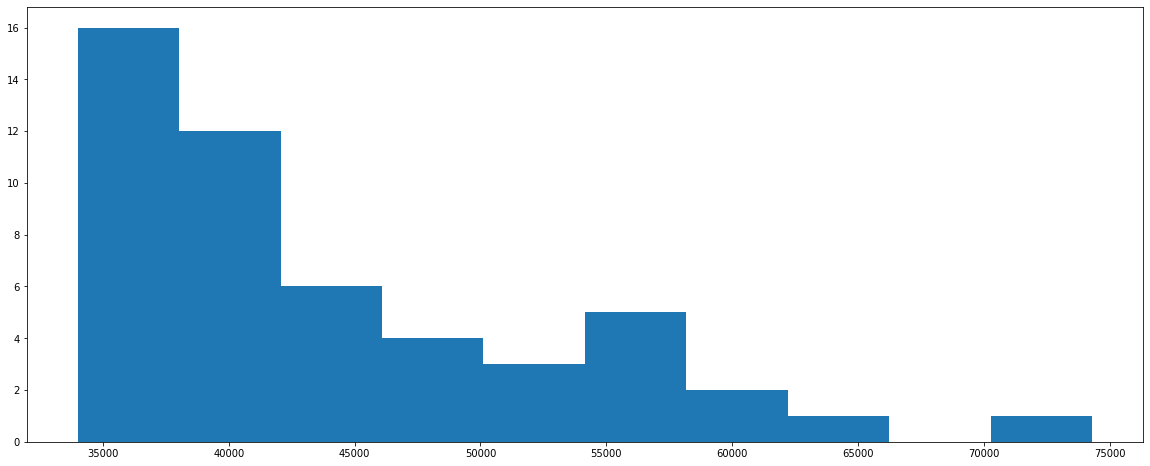

In [79]:
fig, ax = plt.subplots()
ax.hist(df['Starting Median Salary'], bins=10)
plt.show()

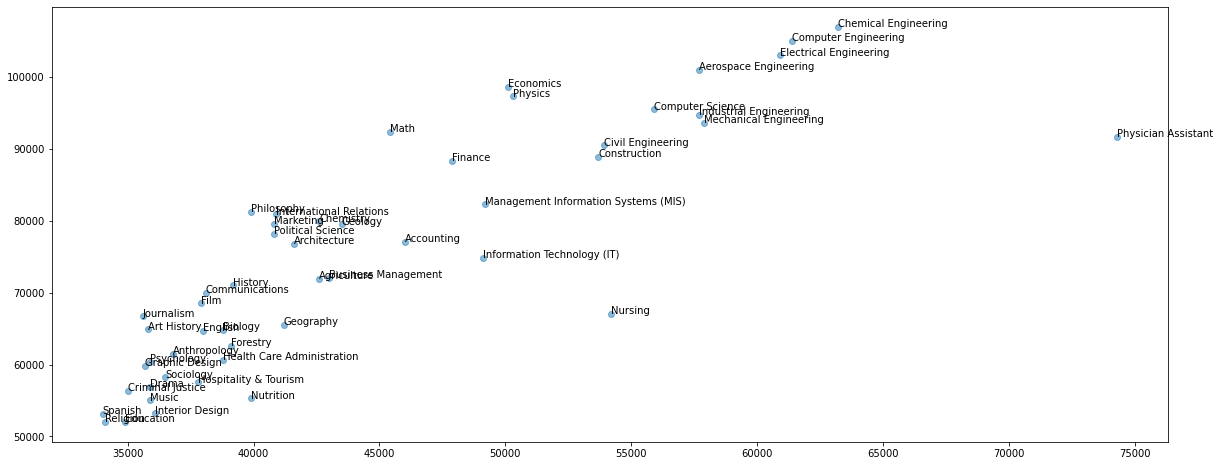

In [78]:
fig, ax = plt.subplots()
plt.scatter(df['Starting Median Salary'], df['Mid-Career Median Salary'], alpha=0.5)

for i, txt in enumerate(df['Undergraduate Major']):
    ax.annotate(txt, (df['Starting Median Salary'][i], df['Mid-Career Median Salary'][i]))
    
plt.show()

In [11]:
df = pd.read_csv("data\salaries-by-region.csv")

In [3]:
df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [3]:
df['Starting Median Salary'] = df['Starting Median Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
df['Mid-Career 75th Percentile Salary'] = df['Mid-Career 75th Percentile Salary'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
df = df[['Region','School Name','Starting Median Salary', 'Mid-Career 75th Percentile Salary']]

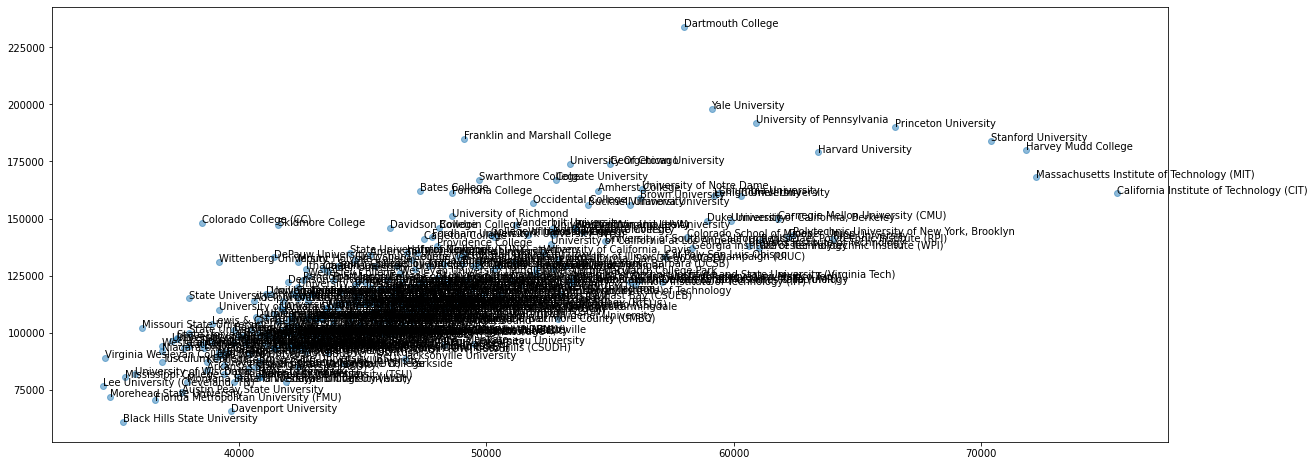

In [5]:
fig, ax = plt.subplots()
plt.scatter(df['Starting Median Salary'], df['Mid-Career 75th Percentile Salary'], alpha=0.5)

for i, txt in enumerate(df['School Name']):
    ax.annotate(txt, (df['Starting Median Salary'][i], df['Mid-Career 75th Percentile Salary'][i]))
    
plt.show()

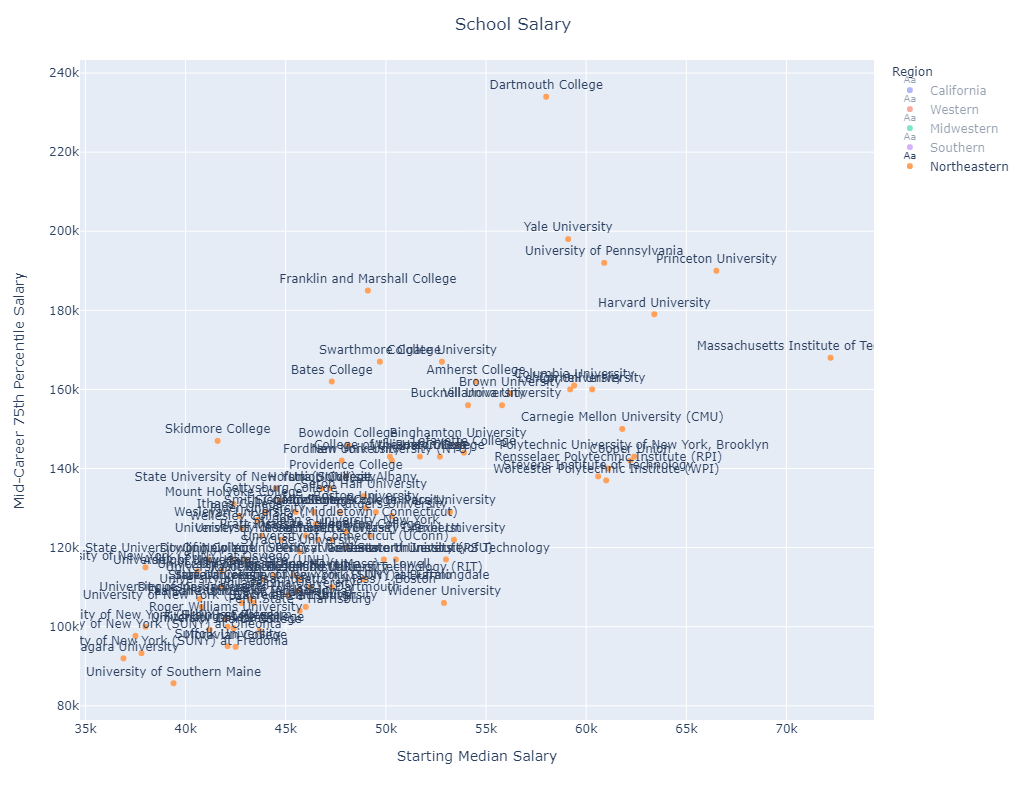

In [5]:
import plotly.express as px
plt.rcParams['figure.figsize'] = [20, 14]
fig = px.scatter(df, x="Starting Median Salary", y="Mid-Career 75th Percentile Salary", color='Region', text="School Name", height=800)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='School Salary', title_x=0.5)
fig.show()

In [28]:
df3 = pd.DataFrame(index=df.index)
df3['Region'] = df['Region']
df3['Size'] = 10
df3[df['School Name'].isin(["University of Southern Maine","Mercy College"])] = ['Highlight',100]

In [29]:
df3

,Region,Size
0,California,10
1,California,10
2,California,10
3,California,10
4,California,10
...,...,...
315,Northeastern,10
316,Northeastern,10
317,Northeastern,10
318,Highlight,100


In [19]:
df2 = pd.DataFrame(index=df.index)
df2['Color']='Blue'
schoolname="New York"
df2[df['School Name'].str.contains(schoolname)] = 'Red'

In [22]:
df

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,"$129,000.00","$68,400.00","$93,100.00",184000.0,"$257,000.00"
1,California Institute of Technology (CIT),California,75500.0,"$123,000.00",NaN,"$104,000.00",161000.0,NaN
2,Harvey Mudd College,California,71800.0,"$122,000.00",NaN,"$96,000.00",180000.0,NaN
3,"University of California, Berkeley",California,59900.0,"$112,000.00","$59,500.00","$81,000.00",149000.0,"$201,000.00"
4,Occidental College,California,51900.0,"$105,000.00",NaN,"$54,800.00",157000.0,NaN
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,38000.0,"$70,300.00","$35,100.00","$51,200.00",100000.0,"$179,000.00"
316,Niagara University,Northeastern,36900.0,"$69,700.00","$44,000.00","$57,000.00",92000.0,"$128,000.00"
317,State University of New York (SUNY) at Fredonia,Northeastern,37800.0,"$66,200.00","$32,800.00","$44,200.00",93300.0,"$181,000.00"
318,University of Southern Maine,Northeastern,39400.0,"$63,600.00","$40,400.00","$47,900.00",85700.0,"$117,000.00"


In [25]:
pd.concat([df,df2], axis=1)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Color
0,Stanford University,California,70400.0,"$129,000.00","$68,400.00","$93,100.00",184000.0,"$257,000.00",Blue
1,California Institute of Technology (CIT),California,75500.0,"$123,000.00",NaN,"$104,000.00",161000.0,NaN,Blue
2,Harvey Mudd College,California,71800.0,"$122,000.00",NaN,"$96,000.00",180000.0,NaN,Blue
3,"University of California, Berkeley",California,59900.0,"$112,000.00","$59,500.00","$81,000.00",149000.0,"$201,000.00",Blue
4,Occidental College,California,51900.0,"$105,000.00",NaN,"$54,800.00",157000.0,NaN,Blue
...,...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,38000.0,"$70,300.00","$35,100.00","$51,200.00",100000.0,"$179,000.00",Red
316,Niagara University,Northeastern,36900.0,"$69,700.00","$44,000.00","$57,000.00",92000.0,"$128,000.00",Blue
317,State University of New York (SUNY) at Fredonia,Northeastern,37800.0,"$66,200.00","$32,800.00","$44,200.00",93300.0,"$181,000.00",Red
318,University of Southern Maine,Northeastern,39400.0,"$63,600.00","$40,400.00","$47,900.00",85700.0,"$117,000.00",Blue
